In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import ancilliary_funcs as af

df = pd.read_csv('subsample_sm_demo.csv')
df

stats.ttest_ind()

,Unnamed: 0,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,ffp_hf,wef_qes,wdi_expedu,wdi_ners
0,9,0.892,AUT,5,38868.0390,8.544000,1.5,4.492075,5.49955,NaN
1,117,0.795,OMN,3,26158.7300,3.717000,1.9,3.535049,4.96038,94.329842
2,89,NaN,PRK,6,1727.8199,NaN,4.2,NaN,NaN,76.203728
3,106,0.438,MLI,4,1063.2600,14.854000,8.4,3.003276,3.73929,34.616100
4,27,0.798,BLR,1,17780.6410,9.468000,3.4,NaN,4.99044,99.465446
...,...,...,...,...,...,...,...,...,...,...
92,167,0.909,SWE,5,39000.9100,9.645000,1.5,4.577006,7.67509,96.651558
93,133,0.515,PNG,9,1693.5400,6.880000,7.1,NaN,NaN,NaN
94,118,0.637,NAM,4,4521.2900,NaN,6.5,3.052896,NaN,NaN
95,148,NaN,SMR,5,42664.2110,0.034000,NaN,NaN,2.38373,NaN


In [18]:
#Se analizan variables
df_result = pd.DataFrame(columns=['nombre','perdidos','porcentaje'])

for col in df.columns:
    res = af.funcion(df,col)
    df_result = df_result.append({'nombre': col,'perdidos': res[0],'porcentaje': res[1]}, ignore_index = True)
    
df_result.sort_values(by=['porcentaje'], ascending=True)

/var/folders/q4/qtrpx3ns2zsf7ycph__16lz80000gn/T/ipykernel_11146/1515712000.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'nombre': col,'perdidos': res[0],'porcentaje': res[1]}, ignore_index = True)
/var/folders/q4/qtrpx3ns2zsf7ycph__16lz80000gn/T/ipykernel_11146/1515712000.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'nombre': col,'perdidos': res[0],'porcentaje': res[1]}, ignore_index = True)
/var/folders/q4/qtrpx3ns2zsf7ycph__16lz80000gn/T/ipykernel_11146/1515712000.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'nombre': col,'perdidos': res[0],'porcentaje': res[1]}, ignore_index = True)
/var/folders/q4/qtrpx3ns2zsf

,nombre,perdidos,porcentaje
0,Unnamed: 0,0,0.00
2,ccodealp,0,0.00
3,ht_region,0,0.00
4,gle_cgdpc,1,1.03
1,undp_hdi,4,4.12
6,ffp_hf,9,9.28
7,wef_qes,22,22.68
8,wdi_expedu,25,25.77
5,imf_pop,28,28.87
9,wdi_ners,34,35.05


##### 3. Estimar el puntaje Z de una variable

In [91]:
#Se ignoran las variables con 0% de registros perdidos ya que no corresponden a variables continuas
#Por lo que se utiliza la variable 'undp_hdi' con un 4.12% de registros perdidos.

def get_zscore(col, case):
    get_point = df[df['ccodealp']==case][col]
    preproc = df[col].dropna()
    get_mean = preproc.mean()
    get_std = np.sqrt(preproc.var())
    return (get_point-get_mean)/get_std

df['z_undp_hdi'] = 0.0
df_na = df.isna()
df2 = df[df_na['undp_hdi'] == False]

for i, serie in df2.iterrows():
    df2.at[i,'z_undp_hdi'] = get_zscore('undp_hdi', serie['ccodealp'])

df2.sort_values(by=['z_undp_hdi'], ascending=False).head(10)



,Unnamed: 0,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,ffp_hf,wef_qes,wdi_expedu,wdi_ners,z_gle_cgdpc,z_undp_hdi
73,127,0.948,NOR,5,57634.770,5.156000,1.6,5.048264,7.37329,95.201927,0.0,1.733538
42,168,0.938,CHE,5,50454.410,8.140000,2.1,5.986858,5.09608,84.246483,0.0,1.666151
30,155,0.924,SGP,7,54268.148,5.470000,3.3,5.797279,2.91579,NaN,0.0,1.571807
24,75,0.919,ISL,5,31313.609,0.329000,2.8,4.882655,7.80585,87.681770,0.0,1.538113
92,167,0.909,SWE,5,39000.910,9.645000,1.5,4.577006,7.67509,96.651558,0.0,1.470725
78,184,0.908,GBR,5,34791.051,64.597000,2.1,4.633322,5.73449,98.279984,0.0,1.463986
83,90,0.899,KOR,6,33181.891,50.747002,3.5,3.615234,5.05211,96.776863,0.0,1.403337
0,9,0.892,AUT,5,38868.039,8.544000,1.5,4.492075,5.49955,NaN,0.0,1.356166
69,158,0.888,SVN,1,24456.561,2.061000,2.8,4.073011,5.48659,94.945908,0.0,1.329210
20,162,0.882,ESP,5,31086.350,46.455002,2.4,3.441691,4.27093,96.458618,0.0,1.288778


In [92]:
df2.sort_values(by=['z_undp_hdi'], ascending=False).tail(10)

,Unnamed: 0,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,ffp_hf,wef_qes,wdi_expedu,wdi_ners,z_gle_cgdpc,z_undp_hdi
72,164,0.488,SDN,4,NaN,NaN,8.8,NaN,NaN,NaN,0.0,-1.366310
82,172,0.484,TGO,4,1036.28000,6.929,7.3,NaN,4.86846,NaN,0.0,-1.393265
29,103,0.473,MWI,4,938.34998,17.604,8.1,3.185532,4.84254,32.942291,0.0,-1.467392
68,63,0.450,GMB,4,1601.88000,NaN,7.7,4.276581,2.76771,NaN,0.0,-1.622384
3,106,0.438,MLI,4,1063.26000,14.854,8.4,3.003276,3.73929,34.616100,0.0,-1.703250
52,97,0.427,LBR,4,488.26999,NaN,6.6,3.472222,2.75756,NaN,0.0,-1.777377
32,41,0.425,COD,4,324.16000,NaN,7.1,2.957447,2.24535,NaN,0.0,-1.790854
88,70,0.414,GIN,4,993.83002,11.745,7.2,2.425785,3.20817,31.788179,0.0,-1.864981
65,116,0.414,MOZ,4,852.39001,25.733,7.4,2.770460,6.48322,19.439980,0.0,-1.864981
63,32,0.347,CAF,4,690.03998,NaN,6.9,NaN,1.22393,13.600750,0.0,-2.316481


Entre las 10 primeras y ultimas observaciones en la columna z_gle_cgdpc se observa que cada vez se van alejando más de la media

##### 4. Estimar el puntaje z de las regiones

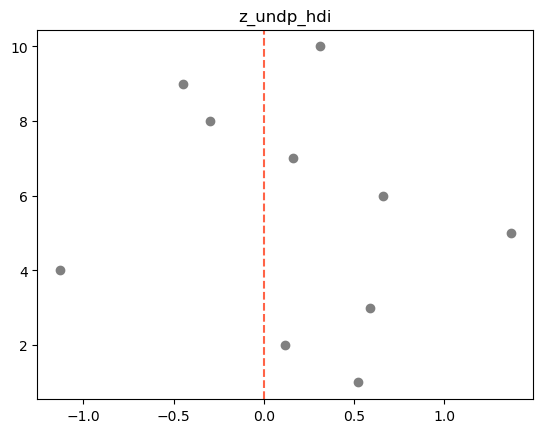

In [106]:
group = round(df2.groupby('ht_region')['z_undp_hdi'].mean(),2)
plt.title('z_undp_hdi')
plt.plot(group.values, group.index, 'o', color = 'grey')
plt.axvline(df2['z_undp_hdi'].mean(), color = 'tomato', linestyle = '--')

##### 5. Generar curvas de Densidad de Probabilidad

In [148]:
#imf_pop, gle_cgdpc y wdi_expedu

def graf_densidad(df, variable):
    df_na = df[variable].dropna()
    mean = df_na.mean()
    var = np.var(df_na)
    
    plt.hist(df_na, color='grey', alpha=.4, density=True)
    x_min, x_max = plt.xlim()
    x_axis = np.linspace(x_min, x_max, 100)
    gauss_kde = stats.gaussian_kde(df_na)
    Z = np.reshape(gauss_kde(x_axis).T, x_axis.shape)
    plt.plot(x_axis, Z, color='tomato', lw=3)
    plt.axvline(mean, color='dodgerblue', linestyle='--', lw=3)
    
    return True

True

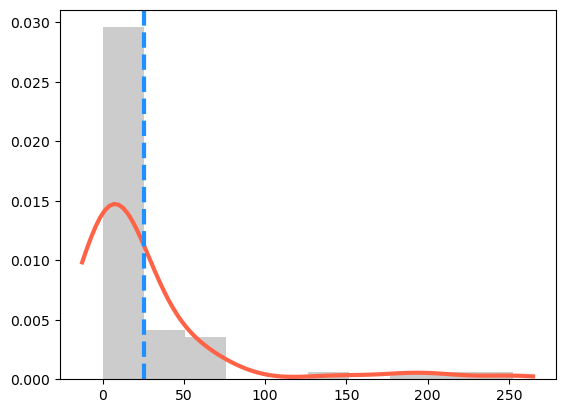

In [149]:
graf_densidad(df2,'imf_pop')

True

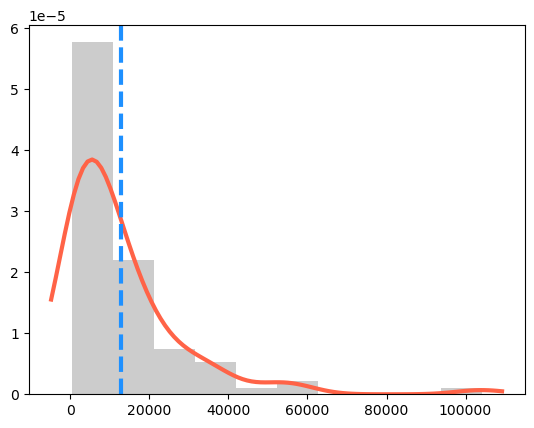

In [150]:
graf_densidad(df2,'gle_cgdpc')

True

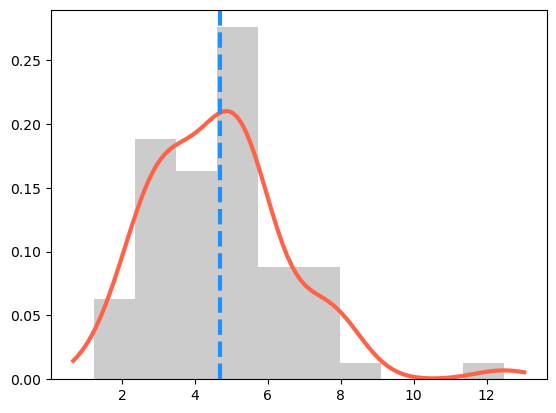

In [151]:
graf_densidad(df2,'wdi_expedu')